In [29]:
import numpy as np

import matplotlib.pyplot as plt
import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS
from tenpy.networks.mps import build_initial_state
from tenpy.models.aklt import AKLTChain

## Numerical ground state search via finite DMRG

Using TeNPy library wich implements DMRG as explained in https://arxiv.org/pdf/1008.3477

In [30]:
L = 4
model_params = {
    'L': L,
    'bc_MPS': 'finite',
}

model = AKLTChain(model_params)
#calculate the MPO of the AKLT Hamiltonian
MPO = model.calc_H_MPO_from_bond()
#AS next step we need an initial MPS: we have two options
#1 use the ground state of the model
psi = model.psi_AKLT()
print("AKLT ground state:", psi)
bond_energies = model.bond_energies(psi)
print("just to check we got the correct bond energies:", bond_energies)

AKLT ground state: MPS, L=4, bc='finite'.
chi: [2, 2, 2]
sites: SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz')
forms: (0.0, 1.0) (0.0, 1.0) (0.0, 1.0) (0.0, 1.0)
just to check we got the correct bond energies: [-0.66666667 -0.66666667 -0.66666667]


In [31]:
#2. Use a random state
#The next is a trivial product state with all spins S_z = +1 or "up"
product_state = ["up"] * model.lat.N_sites  
print("product state:", product_state)
#We have a trivial state with no entanglement so the chi is 1
psi_trivial = MPS.from_product_state(model.lat.mps_sites(), product_state, model_params['bc_MPS'])
print("psi:", psi)
bond_energies = model.bond_energies(psi_trivial)
#The energy per bond is the maximum since we have all spins up so 
# it is 4/3 
print("Bond energies:",bond_energies)
print("Initial energy:", model.bond_energies(psi_trivial).sum())

product state: ['up', 'up', 'up', 'up']
psi: MPS, L=4, bc='finite'.
chi: [2, 2, 2]
sites: SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz')
forms: (0.0, 1.0) (0.0, 1.0) (0.0, 1.0) (0.0, 1.0)
Bond energies: [1.33333333 1.33333333 1.33333333]
Initial energy: 4.0


In [32]:
#Do the DMRG
dmrg_params = {
        'mixer': True,  # setting this to True helps to escape local minima
        'max_E_err': 1.e-6,
        'trunc_params': {
            'chi_max': 20,
            'svd_min': 1.e-10,
        },
        'max_sweeps': 10, 
        'verbose': True,

    }
info = dmrg.run(psi, model, dmrg_params)
energy = info['E']
print(energy)
#If we use the trivial initial state the energy is not properly found

-2.0000000000000036


/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


In [33]:
#Specifically for the DMRG we need a ronadom MPS to start
states = ['up', '0.0', 'down']        #state labels from: model.lat.mps_sites()[0].state_labels
random_indices = np.random.randint(0, 3, size=L)
initial_state = [states[i] for i in random_indices]

print("Random initial state:", initial_state)

psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, model_params['bc_MPS'])
print("psi:", psi)

Random initial state: ['up', 'up', '0.0', 'up']
psi: MPS, L=4, bc='finite'.
chi: [1, 1, 1]
sites: SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz') SpinSite(S=1.0, 'Sz')
forms: (0.0, 1.0) (0.0, 1.0) (0.0, 1.0) (0.0, 1.0)


Now do the DMRG

In [34]:
dmrg_params = {
        'mixer': True,  # setting this to True helps to escape local minima
        'max_E_err': 1.e-6,
        'trunc_params': {
            'chi_max': 20,
            'svd_min': 1.e-10,
        },
        'max_sweeps': 10, 
        'verbose': True,

    }
info = dmrg.run(psi, model, dmrg_params)
energy = info['E']
print(energy)
#If we use the trivial initial state the energy is not properly found

0.5857864376269042


/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Full DMRG test for different system sizes and varying the maximum bond dimension

For each new bond dimension I also take another random MPS initialization, so probably not the best way to check for convergence

/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/julieta/anaconda3/lib/python3.11/site-packages/tenpy/tools/params.py:232: UserWarning: unused option ['verbose'] for config DMRG
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


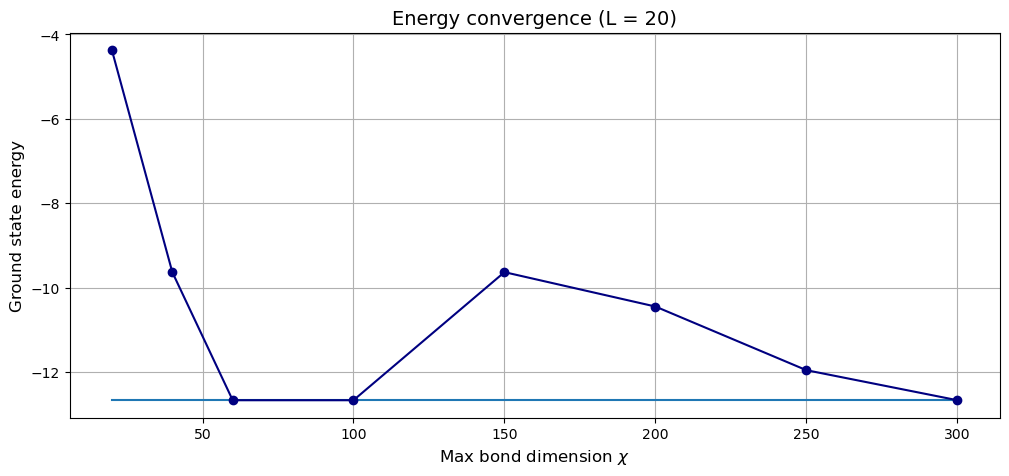

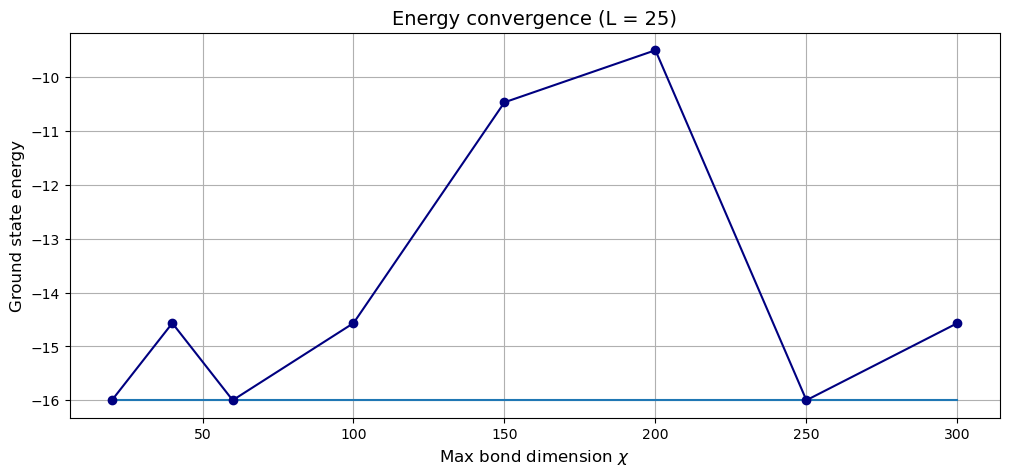

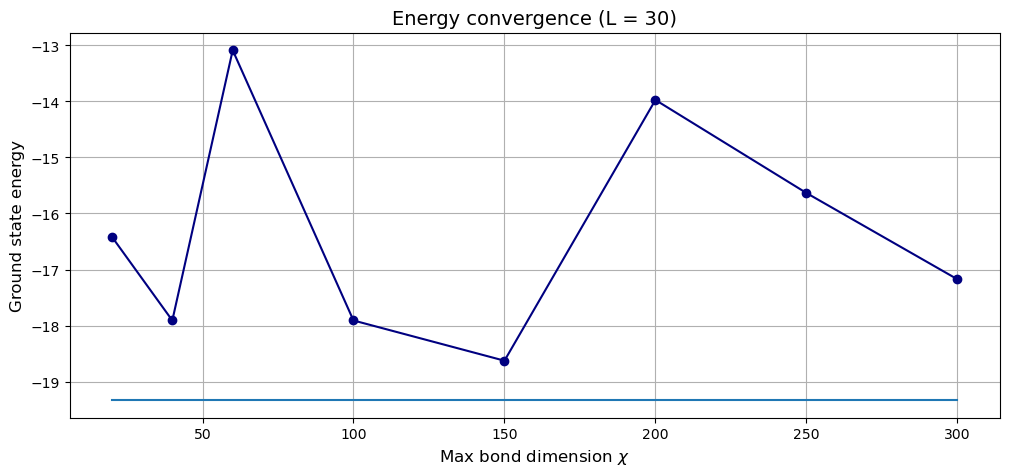

In [38]:
L= [20, 25, 30]

for l in L:

    model_params = {
        'L': l,
        'bc_MPS': 'finite',
    }
    
    model = AKLTChain(model_params)
    #calculate the MPO of the AKLT Hamiltonian
    MPO = model.calc_H_MPO_from_bond()
    
    bond_dims = [20, 40, 60, 100, 150, 200, 250, 300]
    energies = []
    es_analytical = []
    
    
    
    for maxchi in bond_dims:
        states = ['up', '0.0', 'down']
        random_indices = np.random.randint(0, 3, size=l)
        initial_state = [states[i] for i in random_indices]
        psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, model_params['bc_MPS'])
    
        # Compute variance: ⟨H²⟩ - ⟨H⟩²
        options = {
            'compression_method': 'SVD',  # or 'variational'
            'trunc_params': {
                'chi_max': maxchi,  # Same as DMRG's max bond dimension
                'svd_min': 1.e-10,
            }
        }
    
        
        dmrg_params = {
            'mixer': True,  # setting this to True helps to escape local minima
            'max_E_err': 1.e-10,
            'trunc_params': {
                'chi_max': maxchi,
                'svd_min': 1.e-10,
            },
            'min_sweeps': 5, #minimum sweeps before checking convergence
            'max_sweeps': 50,# will stop before if convergence is reached
            'verbose': True,
    
        }
        info = dmrg.run(psi, model, dmrg_params)
        energy = info['E']
        
    
        energies.append(energy)
        
        e_analytical = -(2/3)*(l- 1)
        es_analytical.append(e_analytical)
    
    # Plot energy convergence
    plt.figure(figsize=(12, 5))
    plt.plot(bond_dims, es_analytical)
    plt.plot(bond_dims, energies, 'o-', color='navy', label='DMRG Energy')
    plt.xlabel('Max bond dimension $\\chi$', fontsize=12)
    plt.ylabel('Ground state energy', fontsize=12)
    plt.title('Energy convergence (L = {})'.format(l), fontsize=14)
    plt.grid(True)
